<a href="https://colab.research.google.com/github/jespanaco/ML/blob/main/Actividad_2_Yackelin_Espana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yackeline España A.
# Taller No 2 
# Dado el siguiente data set
kaggle.com/c/house-prices-advanced-regression-techniques/data/train.csv

*   Crear una variable Binaria con respecto a la columna SalePrice , en donde 1 sea SalePrice mayor a 214000.000000 y 0 SalePrice Menor a 214000.000000.
*   Una vez creada esta variable, se debe generar un modelo supervisado
que me pronostique el comportamiento de esta variable binaria. Utilizando las demas columnas del data set.
*  Los resultados a mostrar seran la importancia de las variables
y las metricas de la matriz de confusion.
* Se debe mostrar en un repositorio publico en github 
en un jupyter notebook.

El Dataset para el ejercicio es el siguiente:
Se recomienda usar el dataset con las variables transformadas 
y data limpia ( pues esta fue la primera actividad).

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv








In [6]:
# Importo las librerías básicas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline
sns.set_style('darkgrid')
# Se asignan los datos a un dataframe
df = pd.read_csv('train.csv')
df.head(10)
# Realizo un vistazo las columnas:
df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**La variable 'SalePrice' es la variable objetivo de este conjunto de datos. **


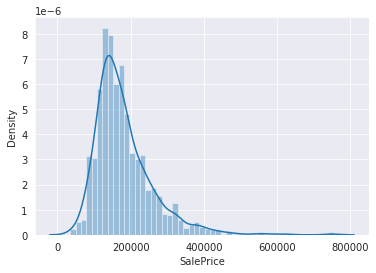

In [7]:
# Resumen de estadística descriptiva

df['SalePrice'].describe()
# Histograma
sns.distplot(df['SalePrice']);

En la gráfica se puede apreciar:

*   Una desviación con respecto a la distribución normal.
*   Una asimetría positiva. 
*   Algunos picos.

In [8]:
# Asimetría y curtosis:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())


Skewness: 1.882876
Kurtosis: 6.536282


## **Relación con variables numéricas**

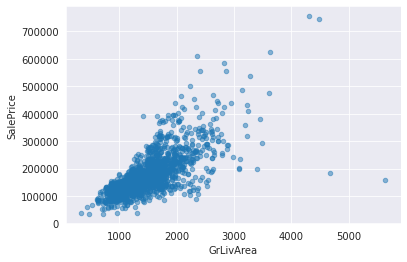

In [9]:
# Diagrama de dispersión grlivarea/saleprice:

var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha = 0.5);

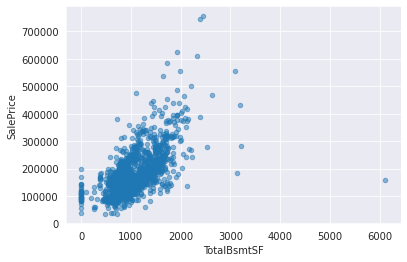

In [10]:
# Diagrama de dispersión totalbsmtsf/saleprice:

var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha = 0.5);

### Relación con variables categóricas

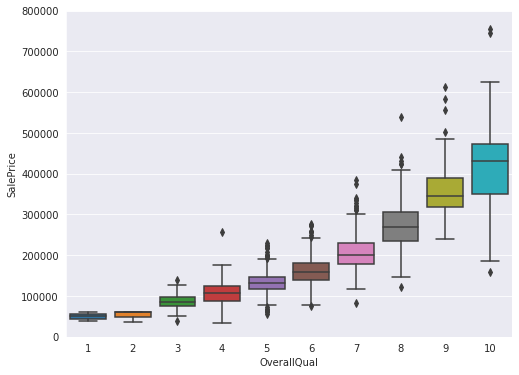

In [11]:
# Diagrama de cajas overallqual/saleprice:
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data =data)
fig.axis(ymin=0, ymax=800000);

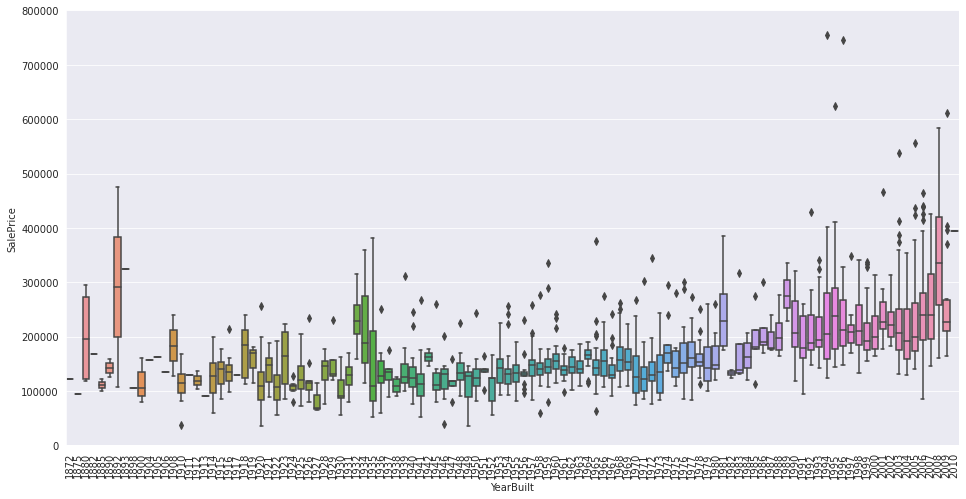

In [12]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data =data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

## Conclusión


*   'GrLivArea' y 'TotalBsmtSF' mantienen una relación lineal positiva con 'SalePrice', aumentando en el mismo sentido. 
*   En el caso de 'TotalBsmtSF', la pendiente de esta relación es muy acentuada.
*   'OverallQual' y 'YearBuilt' también parecen 
relacionadas con 'SalePrice' (más fuerte en el primer caso), tal y como se puede observar en los diagramas de cajas.

## Análisis multivariable
Hasta ahora sólo se ha realizado el análisis de las variables que parecen importantes. Con el fin de hacer un análisis más objetivo, se realizaran las siguientes pruebas de correlación:

*   Matriz de correlación general.
*   Matriz de correlación centrada en la variable 'SalePrice'.
*   Diagramas de dispersión entre las variables más correladas.

## Matriz de correlación (en forma de mapa de calor)

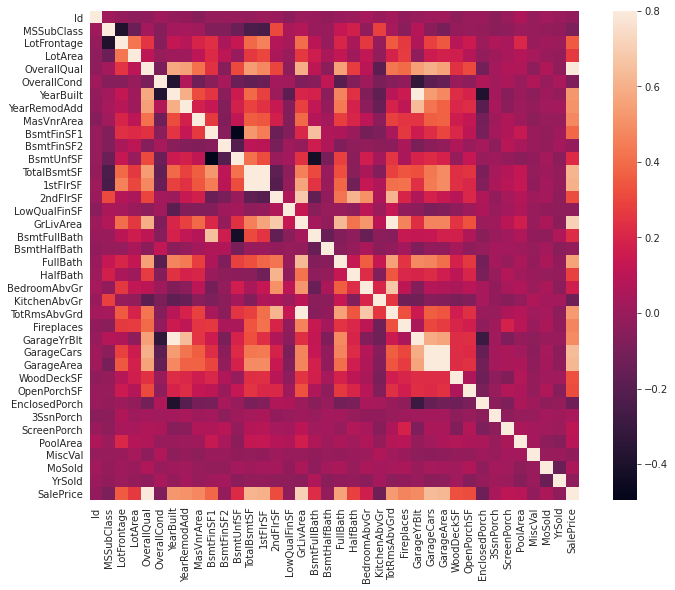

In [13]:
# Matriz de correlación:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

El mapa de calor es una forma visual muy útil para para conocer las variables y sus relaciones. Hay dos variables que llaman la atención: 'TotalBsmtSF' y '1stFlrSF', seguidas por las variables 'GarageX'. En ambos casos parece haber una correlación significativa; y es tan fuerte que podría indicar multicolinealidad, es decir, que básicamente ofrecen la misma información.

Con respecto a las correlaciones de la variable 'SalePrice', destacan las vistas anteriormente ('GrLivArea', 'TotalBsmtSF' y 'OverallQual'), pero hay otras que también deberían ser tenidas en cuenta.

### Matriz de correlación de 'SalePrice'

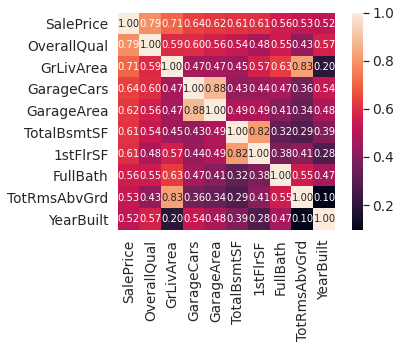

In [14]:
# Matriz de correlación
k = 10 # Número de variables.
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [15]:
corr = df.corr()
corr[['SalePrice']].sort_values(by = 'SalePrice',ascending = False)\
.style.background_gradient()

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


En estas matrices de correlación se puede observar:

*   OverallQual', 'GrLivArea' y 'TotalBsmtSF' están fuertemente correladas con 'SalePrice'.
*   'GarageCars' y 'GarageArea' también están fuertemente correladas pero el número de coches que se pueden aparcar en un garaje es una consecuencia de su superficie. Es por esto que sólo voy a mantener una de estas variables en el análisis, 'GarageCars', ya que está más correlada con 'SalePrice'.
*   'TotalBsmtSF' y '1stFloor' plantean la misma situación. En este caso mantendré 'TotalBsmtSF'.
*   'FullBath' también está correlada con 'SalePrice'. 
*   'TotRmsAbvGrd' y 'GrLivArea', otro caso de multicolinealidad.
*   'YearBuilt' también está ligeramente correlada con  'SalePrice'.

## Diagramas de dispersión entre 'SalePrice' y sus variables correladas

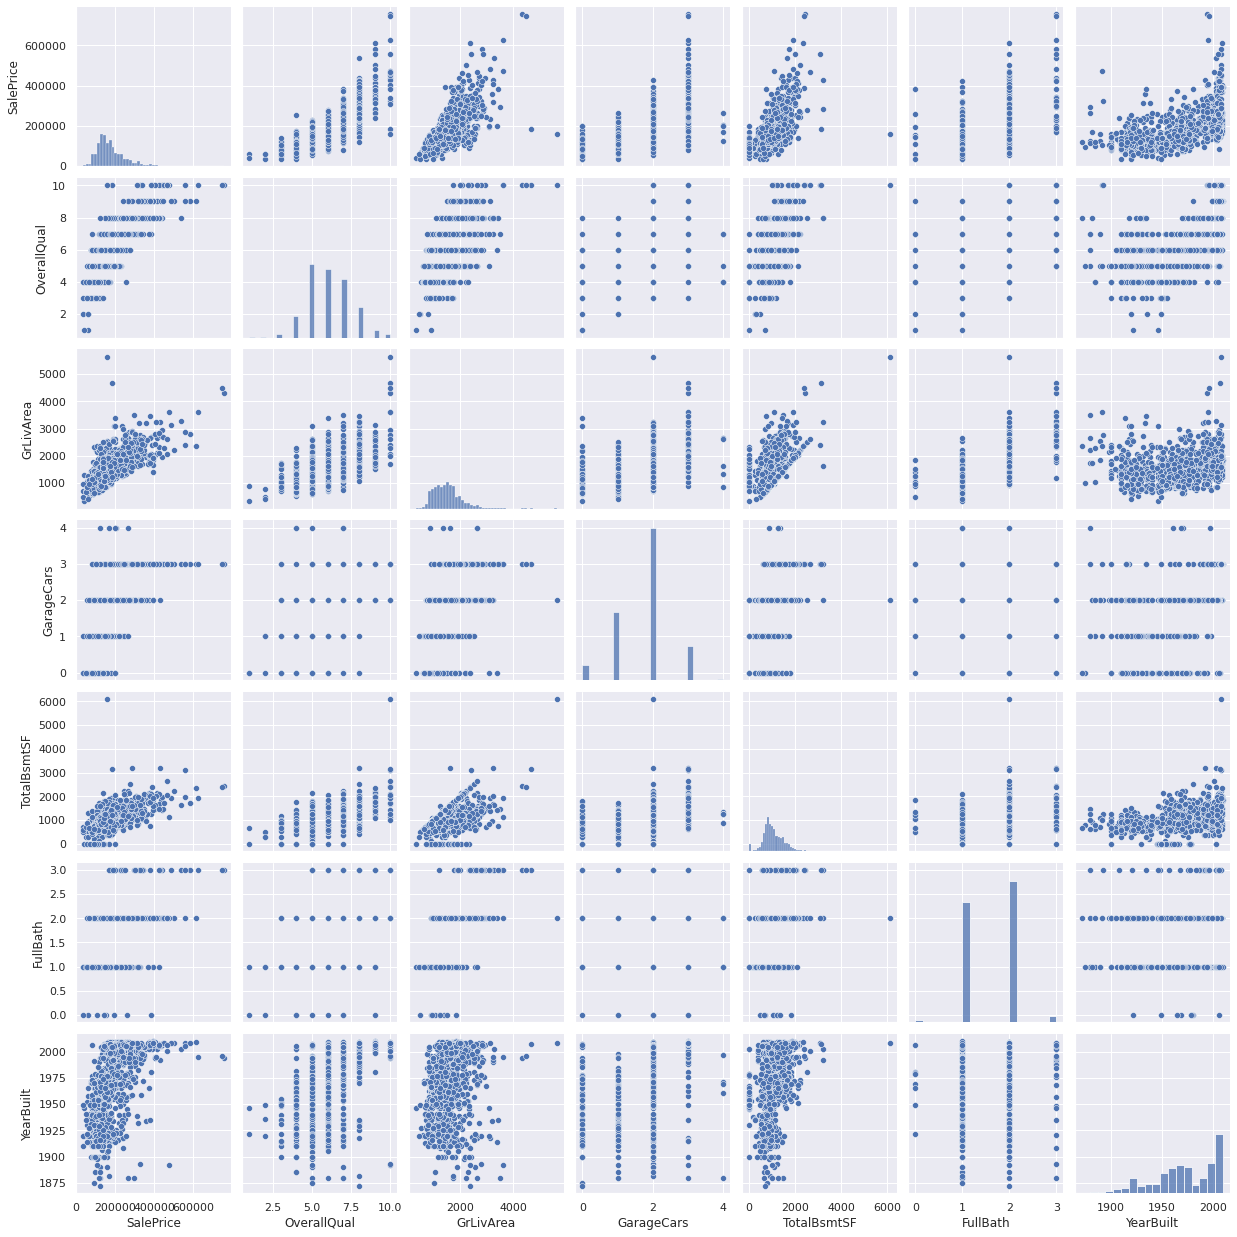

In [16]:
# Scatter plot:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

### Limpieza de datos
**Datos desaparecidos**
Antes de tratar los datos faltantes, es importante determinar su prevalencia y su aleatoriedad, ya que pueden implicar una reducción del tamaño de la muestra. También hay que asegurarse que la gestión de los datos desaparecidos no esté sesgada o esconda una verdad incómoda.

In [17]:
# Datos desaparecidos:

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Por razones prácticas voy a eliminar las variables con más de un 15% de datos faltantes (p.ej. 'PoolQC', 'MiscFeature', 'Alley', etc.); no creo que las echemos de menos, no parecen aspectos importantes a considerar al comprar una casa.

Con respecto a las variables 'GarageX', observo el mismo número de datos desaparecidos, hecho que quizás habría que estudiar con más detenimiento. Pero, dado que la información más relevante en cuanto al garaje ya está recogida por la variable 'GarageCars', y que sólo se trata de un 5% de datos faltantes, borraré las variables 'GarageX', además de las 'BsmtX' bajo la misma lógica.

En cuanto a las variables 'MasVnrArea' y 'MasVnrType', se puede decir que no son esenciales y que, incluso, tienen una fuerte correlación con 'YearBuilt' y 'OverallQual'. No parece que se vaya a perder mucha información si elimino 'MasVnrArea' and 'MasVnrType'.

Para finalizar, encuentro un dato faltante en la variable 'Electrical'. Ya que sólo se trata de una observación, voy a borrarla y a mantener la variable.

En resumen, voy a borrar todas las variables con datos desaparecidos, excepto la variable 'Electrical'; en este caso sólo voy a borrar la observación con el dato faltante.

In [18]:
# Tratamiento de datos faltantes:

df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max() # Para comprobar que no hay más datos desaparecidos.

df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1459, dtype: int64

## Datos atípicos
Los datos atípicos u outliers pueden afectar marcadamente el modelo, además de suponer una fuente de información en sí misma. Su tratamiento requiere más atención; se hace un análisis rápido a través de la desviación estándar de la variable 'SalePrice' y a realizar un par de diagramas de dispersión.

# Análisis univariable
La primera tarea en este caso es establecer un umbral que defina una observación como valor atípico. Para ello voy a estandarizar los datos, es decir, transformar los valores datos para que tengan una media de 0 y una desviación estándar de 1.

In [19]:
# Estandarización de datos:

saleprice_scaled = StandardScaler().fit_transform(df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('Fuera de la distribución (por debajo):')
print(low_range)
print('\nFuera de la distribución (por arriba):')
print(high_range)

Fuera de la distribución (por debajo):
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

Fuera de la distribución (por arriba):
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


*   Los valores bajos son similares y no muy alejados del 0.
*   Los valores altos están muy alejados del 0. Los valores superiores a 7 están realmente fuera de rango.


## Análisis bivariable

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


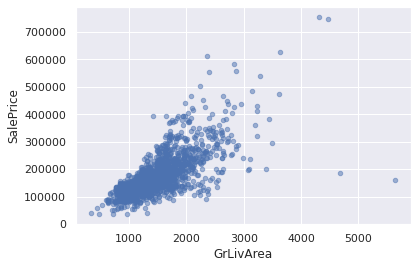

In [20]:
# Análisis bivariable SalePrice/GrLivArea:

var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', alpha = 0.5);

Este diagrama de dispersión muestra que:

*   Los dos valores más altos de la variable 'GrLivArea' podría tratarse de terrenos agrícolas o muy degradados, lo cual explicaría su bajo precio. Lo que está claro es que estos dos puntos son atípicos, por lo que se eliminan.
*   Las dos observaciones más altas de la variable 'SalePrice' se corresponden con las que observamos en el análisis univariable anterior. Son casos especiales, pero parece que siguen la tendencia general, por lo que voy a mantenerlas.

In [21]:
# Eliminación de valores:

df.sort_values(by = 'GrLivArea', ascending = False)[:2]
df = df.drop(df[df['Id'] == 1299].index)
df = df.drop(df[df['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


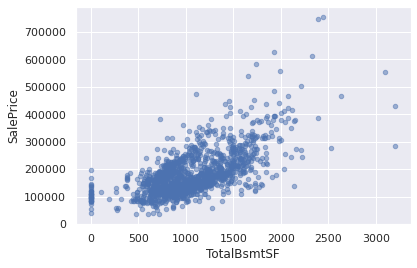

In [22]:
# Análisis bivariable SalePrice/TotalBsmtSF:

var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', alpha = 0.5);

Aunque se pueden observar algunos valores bastante extremos (p.ej. TotalBsmtSF > 3000), parece que conservan la tendencia, por lo que se mantienen.

## Comprobación de normalidad
Ya se realizo cierta limpieza de datos y estudiado la variable 'SalePrice'. Ahora voy a comprobar si 'SalePrice' cumple las asunciones estadísticas que nos permiten aplicar las técnicas del análisis multivariable.

Se comprobará con cuatro suposiciones fundamentales:

**Normalidad** - Cuando hablamos de normalidad lo que queremos decir es que los datos deben parecerse a una distribución normal. Es importante porque varias pruebas estadísticas se basan en esta suposición. Sólo voy a comprobar la normalidad de la variable 'SalePrice', aunque resulte un tanto limitado ya que no asegura la normalidad multivariable. Además, si resolvemos la normalidad evitamos otros problemas, como la homocedasticidad.
**Homocedasticidad** - La homocedasticidad se refiere a la suposición de que las variables dependientes tienen el mismo nivel de varianza en todo el rango de las variables predictoras. La homocedasticidad es deseable porque queremos que el término de error sea el mismo en todos los valores de las variables independientes.
**Linealidad**- La forma más común de evaluar la linealidad es examinar los diagramas de dispersión y buscar patrones lineales. Si los patrones no son lineales, valdría la pena explorar las transformaciones de datos. Sin embargo, no voy a entrar en esto porque la mayoría de los gráficos de dispersión que hemos visto parecen tener relaciones lineales.
**Ausencia de errores correlacionados** - Esto ocurre a menudo en series temporales, donde algunos patrones están relacionados en el tiempo. Tampoco voy a tocar este asunto.

En búsqueda de la normalidad
El objetivo es estudiar la variable 'SalePrice' de forma fácil, comprobando:

*   Histograma - Curtosis y asimetría.
*   Gráfica de probabilidad normal - La distribución de los datos debe ajustarse a la diagonal que representa la distribución normal.

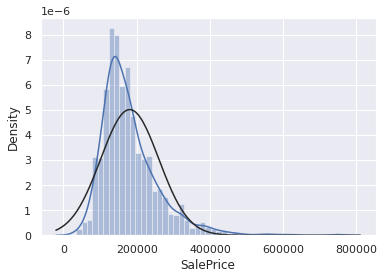

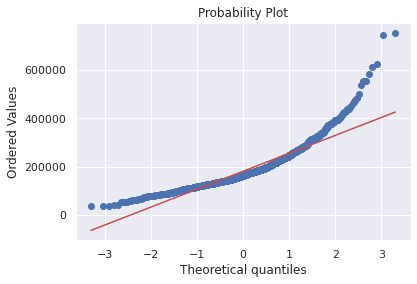

In [23]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(df['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot = plt)

De estos gráficos se desprende que 'SalePrice' no conforma una distribución normal. Muestra picos, asimetría positiva y no sigue la línea diagonal; aunque una simple transformación de datos puede resolver el problema.

In [24]:
# Transformación de los datos:

df['SalePrice1'] = np.log(df['SalePrice'])

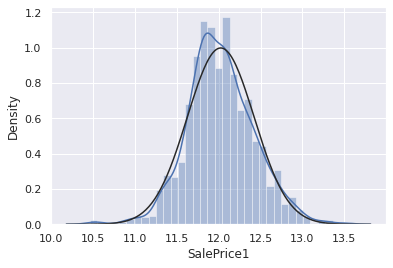

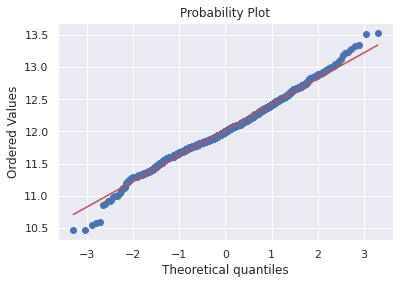

In [25]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados:

sns.distplot(df['SalePrice1'], fit = norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice1'], plot = plt)

Estos gráficos nos muestran que la variable 'TotalBsmtSF':

Presenta asimetrías.
Hay un número significativo de observaciones con valor cero (casas sin sótano).
El valor cero no nos permite hacer transformaciones logarítmicas.

Para aplicar una transformación logarítmica, crearé una variable binaria (tener o no tener sótano). 

Después, aplicaré la transformación logarítmica a todas las observaciones que no sean cero, ignorando aquellas con valor cero. De esta manera podré transformar los datos, sin perder el efecto de tener o no sótano.

In [26]:
# Crear una variable Binaria con respecto a la columna SalePrice, en donde 1 sea SalePrice mayor a 214000.000000
# y 0 SalePrice Menor a 214000.000000.

df['CatSalePrice'] = pd.Series(len(df['SalePrice']), index = df.index)

df['CatSalePrice'] = 0 
df.loc[df['SalePrice']>214000,'CatSalePrice'] = 1
df['CatSalePrice']




0       0
1       0
2       1
3       0
4       1
       ..
1455    0
1456    0
1457    1
1458    0
1459    0
Name: CatSalePrice, Length: 1457, dtype: int64

## Regresión lineal
Particionamos el conjunto de datos en entrenamiento y prueba

Usamos sklearn.linear_model.LinearRegression para ajustar nuestro modelo a los datos de entrenamiento. 

In [27]:
from sklearn.model_selection import train_test_split

overall=df['OverallQual'].values	
grliv=df['GrLivArea'].values	
garage=df['GarageCars'].values	
areag=df['GarageArea'].values
catsal=df['CatSalePrice'].values

X=np.array([overall,grliv,garage,areag  ]).T

Y=np.array(catsal)

from sklearn.linear_model import LinearRegression
reg=LinearRegression()

reg=reg.fit(X,Y)
Y_pred=reg.predict(X)
error=np.sqrt(mean_squared_error(Y,Y_pred))
r2=reg.score(X,Y)

print('El error es:',error)

print('El valor de R2 es:',r2)

print('El valor de los coeficientes es:',reg.coef_)


El error es: 0.3005161433324212
El valor de R2 es: 0.5163490699826206
El valor de los coeficientes es: [ 0.12280285  0.0002551  -0.06097421  0.00053016]


In [28]:
# Cre otro dataset solo con  los datos numericos
df1 = df.loc[:, df.select_dtypes(include=[np.number]).columns]
df1



,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice1,CatSalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694,0
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011,0
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167,1
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398,0
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,175000,12.072541,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,210000,12.254863,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,266500,12.493130,1
1458,1459,20,9717,5,6,1950,1996,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010,142125,11.864462,0


In [29]:
# Resumen descriptivo del dataset
df1.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice1,CatSalePrice
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,729.805765,56.877145,10460.434454,6.094715,5.576527,1971.194235,1984.818806,439.128346,46.645161,567.222375,1052.995882,1159.129032,345.560055,5.856555,1510.545642,0.424159,0.057653,1.563487,0.381606,2.866163,1.046671,6.510638,0.611531,1.765957,472.099520,94.080302,46.277282,21.999314,3.416609,15.091970,2.435141,43.578586,6.323953,2007.816060,180942.138641,12.024005,0.248456
std,421.402158,42.339638,9862.564977,1.376542,1.113638,30.190353,20.640669,432.964939,161.471529,442.212926,414.754657,372.015864,435.505117,48.672424,508.043712,0.517463,0.238984,0.549961,0.502622,0.816595,0.220555,1.616384,0.642008,0.747336,212.303718,125.392964,65.324107,61.173949,29.347109,55.810633,38.223013,496.629946,2.700872,1.329273,79521.569966,0.399853,0.432266
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,10.460242,0.000000
25%,365.000000,20.000000,7540.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,796.000000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,330.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000,11.774520,0.000000
50%,730.000000,50.000000,9473.000000,6.000000,5.000000,1972.000000,1994.000000,383.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,12.001505,0.000000
75%,1094.000000,70.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,712.000000,0.000000,808.000000,1297.000000,1391.000000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,12.273731,0.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,2188.000000,1474.000000,2336.000000,3206.000000,3228.000000,2065.000000,572.000000,4476.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1390.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,13.534473,1.000000


In [30]:
df1.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice1,CatSalePrice
Id,1.000000,0.010553,-0.037641,-0.029403,0.013485,-0.014701,-0.023859,-0.013956,-0.005501,-0.007067,-0.024244,0.005079,0.004537,-0.044100,0.003384,0.000721,-0.019789,0.004915,0.004776,0.037507,0.003305,0.024928,-0.022139,0.016546,0.014688,-0.030336,-0.001367,0.003487,-0.046515,0.001778,0.048583,-0.006107,0.024051,0.000232,-0.021512,-0.017801,-0.027549
MSSubClass,0.010553,1.000000,-0.142020,0.032830,-0.059092,0.027340,0.040121,-0.074087,-0.065524,-0.140678,-0.252841,-0.262254,0.308499,0.046537,0.076873,0.003603,-0.002218,0.131518,0.177064,-0.023519,0.281864,0.040227,-0.045671,-0.040370,-0.099677,-0.012700,-0.006395,-0.011869,-0.043774,-0.025906,0.008114,-0.007642,-0.013400,-0.021440,-0.084222,-0.073981,-0.103744
LotArea,-0.037641,-0.142020,1.000000,0.091372,-0.002749,0.007523,0.007558,0.175331,0.114286,-0.003273,0.224033,0.269289,0.041066,0.005530,0.232920,0.147182,0.050057,0.119745,0.007429,0.120321,-0.016806,0.175446,0.261210,0.152505,0.163670,0.168624,0.061836,-0.016524,0.021356,0.045275,0.036488,0.039068,0.005719,-0.013692,0.268174,0.260545,0.248803
OverallQual,-0.029403,0.032830,0.091372,1.000000,-0.090753,0.572382,0.550751,0.222040,-0.058496,0.308849,0.538312,0.468790,0.290530,-0.030202,0.589427,0.103619,-0.039576,0.549091,0.271337,0.101713,-0.184236,0.420891,0.392160,0.601062,0.557188,0.236831,0.296915,-0.113402,0.030934,0.066167,0.044733,-0.031293,0.072285,-0.026506,0.795863,0.821589,0.649509
OverallCond,0.013485,-0.059092,-0.002749,-0.090753,1.000000,-0.375368,0.075033,-0.043367,0.039936,-0.136891,-0.175676,-0.145176,0.030752,0.025374,-0.077513,-0.053983,0.117604,-0.193250,-0.059571,0.013158,-0.087254,-0.055682,-0.022753,-0.185187,-0.150643,-0.002658,-0.030060,0.070002,0.025387,0.054542,0.002299,0.068703,-0.003909,0.043848,-0.078016,-0.036820,-0.088034
YearBuilt,-0.014701,0.027340,0.007523,0.572382,-0.375368,1.000000,0.591759,0.250822,-0.048478,0.149240,0.402082,0.282358,0.006438,-0.183759,0.194671,0.185788,-0.037631,0.466832,0.240384,-0.071155,-0.174545,0.091025,0.145847,0.537316,0.478503,0.223765,0.184792,-0.387002,0.031684,-0.049782,-0.005123,-0.034219,0.013370,-0.013365,0.523986,0.587301,0.403853
YearRemodAdd,-0.023859,0.040121,0.007558,0.550751,0.075033,0.591759,1.000000,0.123879,-0.067192,0.181346,0.296511,0.239764,0.137000,-0.062225,0.287046,0.117481,-0.011804,0.437610,0.181047,-0.041006,-0.149311,0.188275,0.110678,0.419831,0.370411,0.204638,0.223439,-0.193371,0.045608,-0.038176,-0.003380,-0.010100,0.022392,0.036058,0.508047,0.566208,0.407180
BsmtFinSF1,-0.013956,-0.074087,0.175331,0.222040,-0.043367,0.250822,0.123879,1.000000,-0.049842,-0.522807,0.467083,0.394655,-0.163903,-0.066765,0.142089,0.658321,0.073613,0.048390,-0.008327,-0.114919,-0.083220,0.011235,0.242500,0.229384,0.273115,0.205099,0.072262,-0.104145,0.029107,0.068226,0.052955,0.004681,-0.004624,0.015869,0.409415,0.392429,0.304689
BsmtFinSF2,-0.005501,-0.065524,0.114286,-0.058496,0.039936,-0.048478,-0.067192,-0.049842,1.000000,-0.209352,0.114076,0.103752,-0.098654,0.014737,-0.007184,0.159961,0.070815,-0.075831,-0.031470,-0.015633,-0.040882,-0.034180,0.047835,-0.037854,-0.017177,0.068323,0.004835,0.036338,-0.030066,0.088725,0.046339,0.004888,-0.015461,0.031646,-0.011456,0.004866,-0.017166
BsmtUnfSF,-0.007067,-0.140678,-0.003273,0.308849,-0.136891,0.149240,0.181346,-0.522807,-0.209352,1.000000,0.438938,0.329481,0.003574,0.028179,0.247027,-0.424917,-0.095824,0.288847,-0.041242,0.166682,0.030103,0.251646,0.051876,0.213784,0.184502,-0.005596,0.128745,-0.002524,0.020774,-0.012572,-0.034956,-0.023839,0.033862,-0.040917,0.214427,0.221909,0.190894


In [31]:
modelotrain = df1
# creo la variabla binaria
modelotrain["NUEVA_VARIABLE"] = np.where(modelotrain['SalePrice']>214000 , 1, 0)
modelotrain

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice1,CatSalePrice,NUEVA_VARIABLE
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694,0,0
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011,0,0
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167,1,1
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,175000,12.072541,0,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,210000,12.254863,0,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,266500,12.493130,1,1
1458,1459,20,9717,5,6,1950,1996,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010,142125,11.864462,0,0


In [32]:
modelotrain.SalePrice.describe()

count      1457.000000
mean     180942.138641
std       79521.569966
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [54]:
y_train = modelotrain['NUEVA_VARIABLE']
x_train = modelotrain.loc[:,["YrSold","GarageCars","YearBuilt", "OverallQual"]]

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4
                                     )
arbol_decision = decision_tree.fit(x_train, y_train)



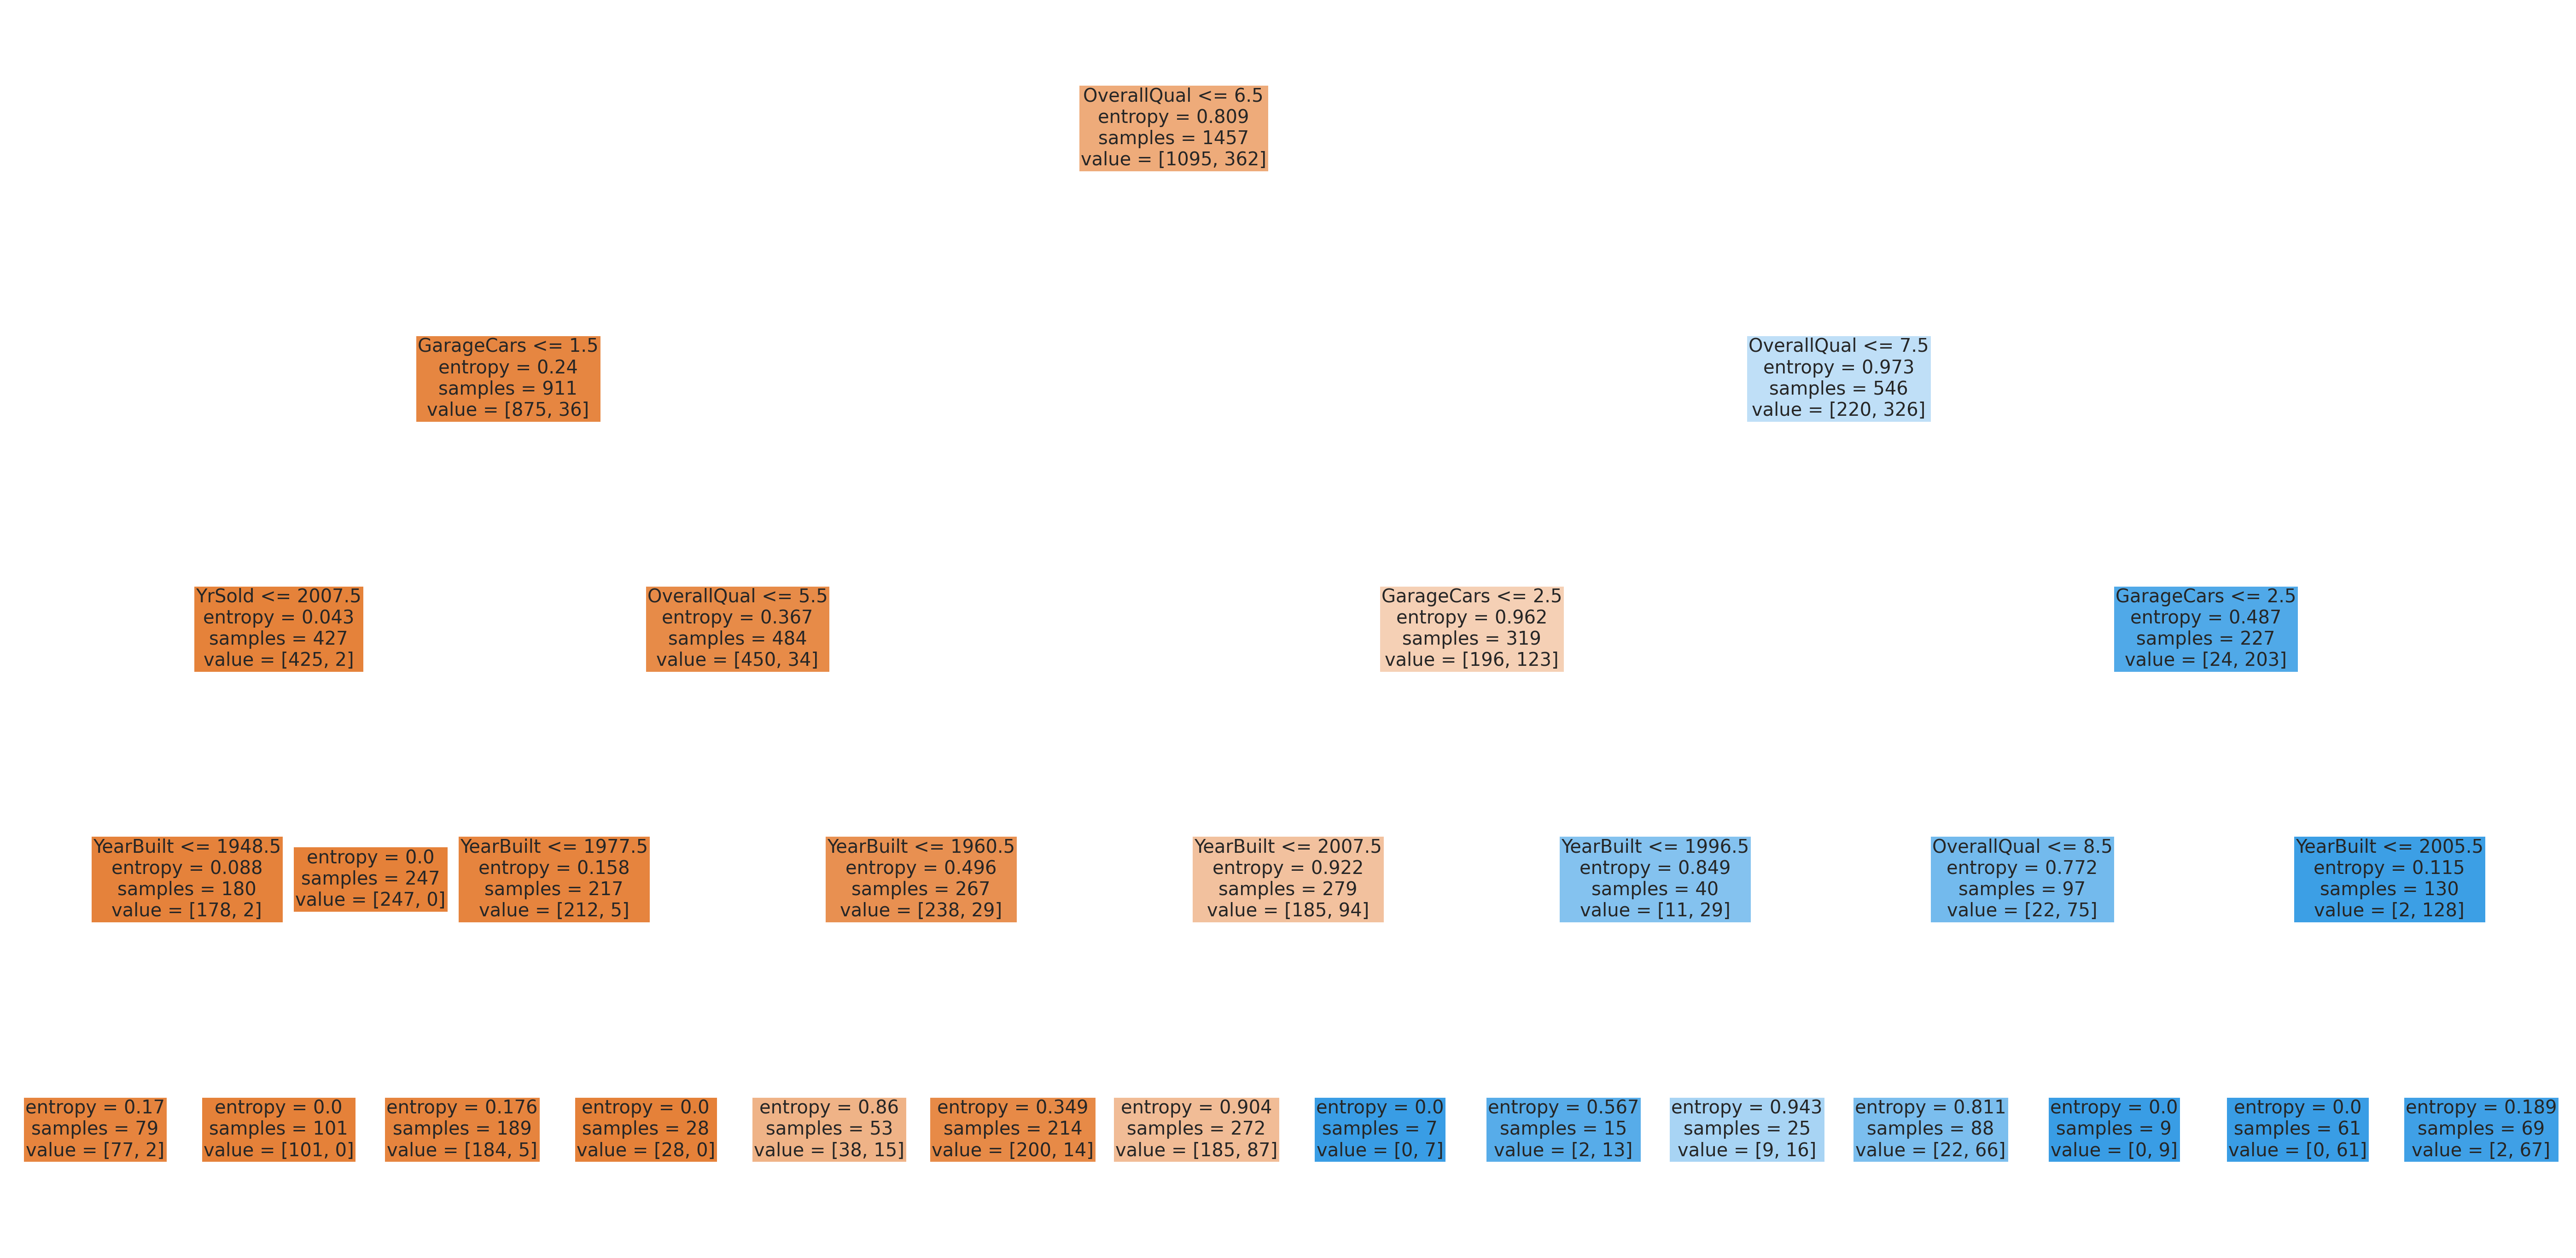

In [61]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tree.plot_tree(arbol_decision, filled=1,fontsize=40,feature_names=("YrSold","GarageCars","YearBuilt", "OverallQual"))

plt.rcParams["figure.figsize"] = (100,50)

plt.show()

De acuerdo a los resultados del modelo de Arbol de 
Decision con la funcion entropia se concluye :


*   La  variable "OverallQual" es la primera que se usa en el primer nivel de decision, si la calificacion es mayor a 6.5, es decir y de acuerdo a la variable categorica que  el inmueble su costo sea  mayor al  valor seleccionado como corte (214000)
*   De segundo lugar lo ocupa la variable "GrLivArea" 
*   De tercer lugar  la variable "GarageCars" se puede notar que si el garage tiene capacidad de mas de 2.5 carros la probabilidad de que valga el inmueble mas de 214000 es mayor



